In [103]:
import pandas as pd

Загружаем датасет:

In [104]:
data_orig = pd.read_csv('Titanic.csv')
data_orig

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Проведем те же операции, что и в task_3.2.1 для получения "нашей" модели.

Удаляем все строки, содержащие пропущенные данные:

In [105]:
data_proc = data_orig.dropna()

Видим, что признаки Name, Sex, Ticket, Cabin и Embarked имеют не числовые значения. Удаляем все, кроме Sex и Embarked:

In [106]:
data_proc = data_proc.drop(["Name", "Ticket","Cabin"], axis=1)

Кодируем категориальные данные в столбцах Sex и Embarked:

In [107]:
data_proc.loc[data_proc["Sex"] == "male", "Sex"] = 0
data_proc.loc[data_proc["Sex"] == "female", "Sex"] = 1
data_proc["Sex"] = pd.to_numeric(data_proc["Sex"])

In [108]:
data_proc.loc[data_proc["Embarked"] == "C", "Embarked"] = 1
data_proc.loc[data_proc["Embarked"] == "S", "Embarked"] = 2
data_proc.loc[data_proc["Embarked"] == "Q", "Embarked"] = 3
data_proc["Embarked"] = pd.to_numeric(data_proc["Embarked"])

Удалим столбец PassangerId:

In [109]:
data_proc.drop(["PassengerId"], axis=1, inplace=True)

Далее отделим целевую переменную от данных и разобъем их на обучающую и тестовую выборки:

In [110]:
X = data_proc.drop(["Survived"], axis=1)
y = data_proc["Survived"]

In [111]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

Далее будем обучать модели и оценивать их качество с помощью функции:

In [112]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve
from sklearn.metrics import recall_score, precision_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

def train_and_score(clf, model_name, show_plots=True):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_pred_probs = clf.predict_proba(X_test)[:, 1]
    
    metrics = {
        'model': model_name,
        'accuracy': round(accuracy_score(y_test, y_pred), 4),
        'recall': round(recall_score(y_test, y_pred), 4),
        'precision': round(precision_score(y_test, y_pred), 4),
        'f1': round(f1_score(y_test, y_pred), 4)
    }

    print(f"\n{model_name}")
    print("=" * len(model_name))
    print(f"Accuracy:  {metrics['accuracy']:.4f}")
    print(f"Recall:    {metrics['recall']:.4f}")
    print(f"Precision: {metrics['precision']:.4f}")
    print(f"F1-score:  {metrics['f1']:.4f}")
    
    if show_plots:
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 5))
        
        sns.heatmap(confusion_matrix(y_test, y_pred), 
                    annot=True, fmt='d', cmap='Blues', ax=ax1)
        ax1.set_title('Confusion Matrix')
        
        precision, recall, _ = precision_recall_curve(y_test, y_pred_probs)
        ax2.plot(recall, precision)
        ax2.set(xlabel='Recall', ylabel='Precision', 
               title='Precision-Recall Curve')
        
        fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
        ax3.plot(fpr, tpr)
        ax3.plot([0, 1], [0, 1], 'k--')
        ax3.set(xlabel='FPR', ylabel='TPR', title='ROC Curve')
        
        plt.tight_layout()
        plt.show()
    
    return metrics


Применим логистическую регрессию


Логистическая регрессия
Accuracy:  0.7273
Recall:    0.8649
Precision: 0.7619
F1-score:  0.8101


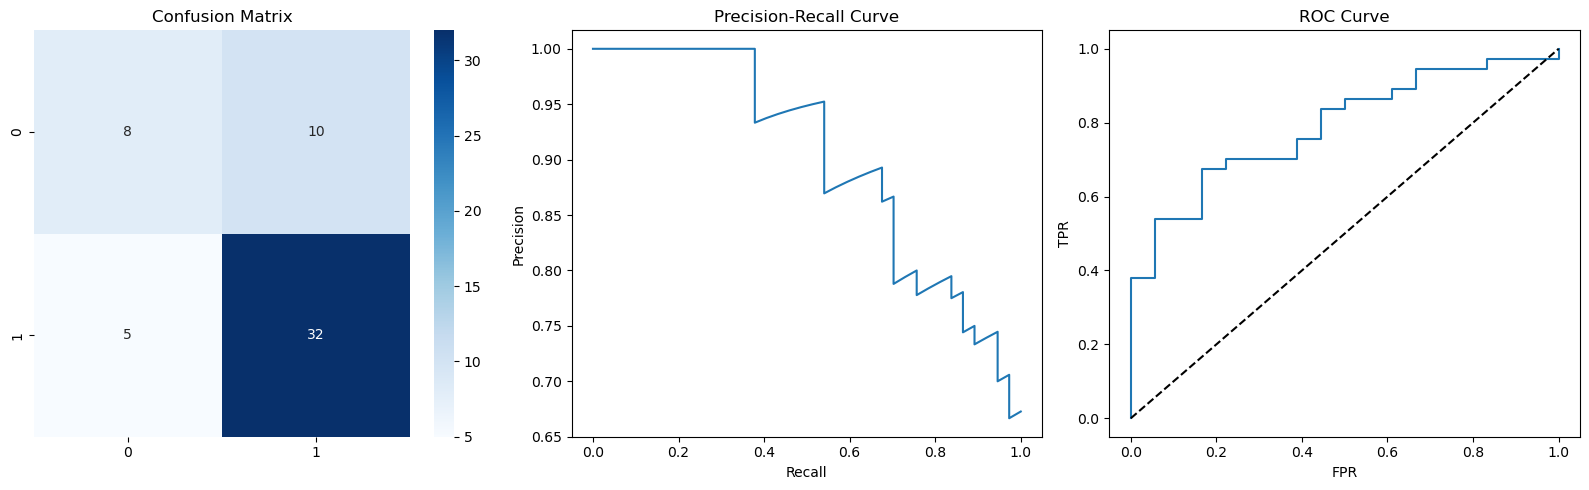

In [113]:
from sklearn.linear_model import LogisticRegression
train_and_score(LogisticRegression(max_iter=200), "Логистическая регрессия")
plt.show()

Модель показывает точность (accuracy) 72.7%, что указывает на определенные ограничения в её предсказательной способности. Мы видим характерный дисбаланс: высокий recall (86.5%) при более умеренном precision (76.2%), что говорит о склонности модели чаще предсказывать положительный класс. Это подтверждается матрицей ошибок, где заметна доля ложноположительных случаев.

При этом F1-score (0.810) остается на хорошем уровне, а кривые Precision-Recall и ROC демонстрируют стабильную работу модели, хоть и с перекосом в сторону recall. В целом модель дает качественные предсказания, но для некоторых задач может потребоваться дополнительная балансировка precision и recall.

Теперь применим метод опорных векторов:


Метод опорных векторов
Accuracy:  0.6727
Recall:    0.7568
Precision: 0.7568
F1-score:  0.7568


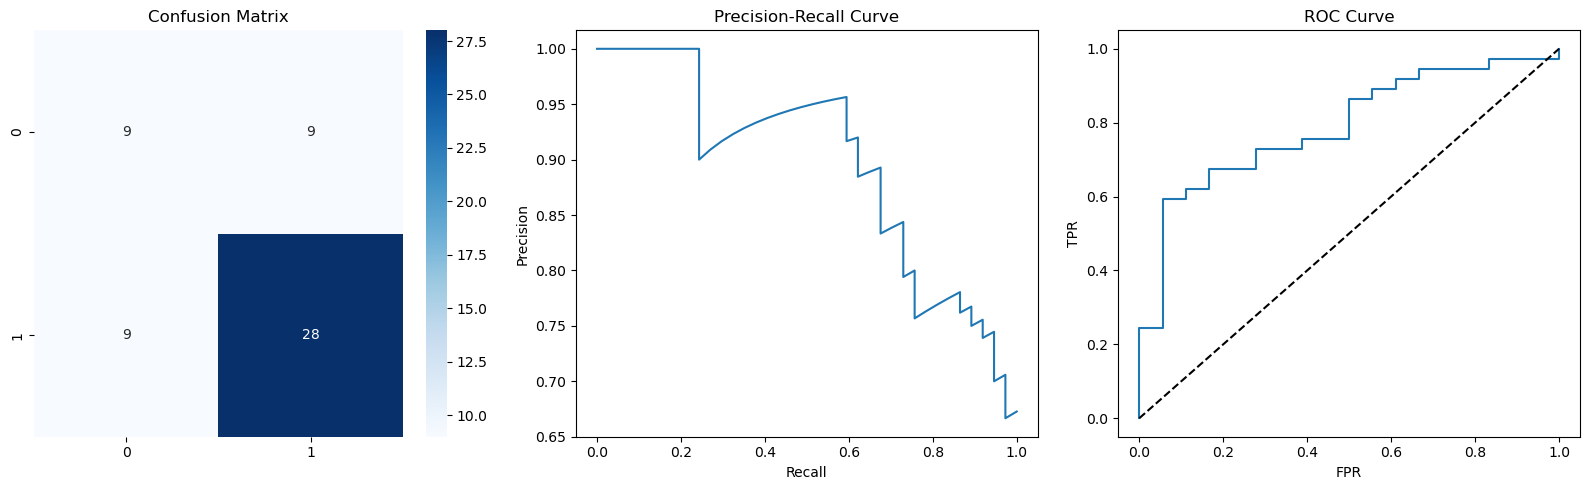

In [114]:
from sklearn.svm import SVC
train_and_score(SVC(kernel='linear', probability=True), "Метод опорных векторов")
plt.show()

Модель SVM показывает более скромные результаты по сравнению с логистической регрессией. При общей точности (accuracy) 67.3% мы наблюдаем сбалансированные precision и recall на уровне 75.7%, что говорит о примерно равном количестве ложноположительных и ложноотрицательных ошибок. Однако такая балансировка достигнута за счет снижения общей предсказательной способности модели. F1-меру в 75.7% можно считать приемлемой, но не выдающейся. В целом, модель SVM в данном случае уступает по эффективности логистической регрессии.

И метод ближайших соседей:


Метод ближайших соседей
Accuracy:  0.6727
Recall:    0.9189
Precision: 0.6939
F1-score:  0.7907


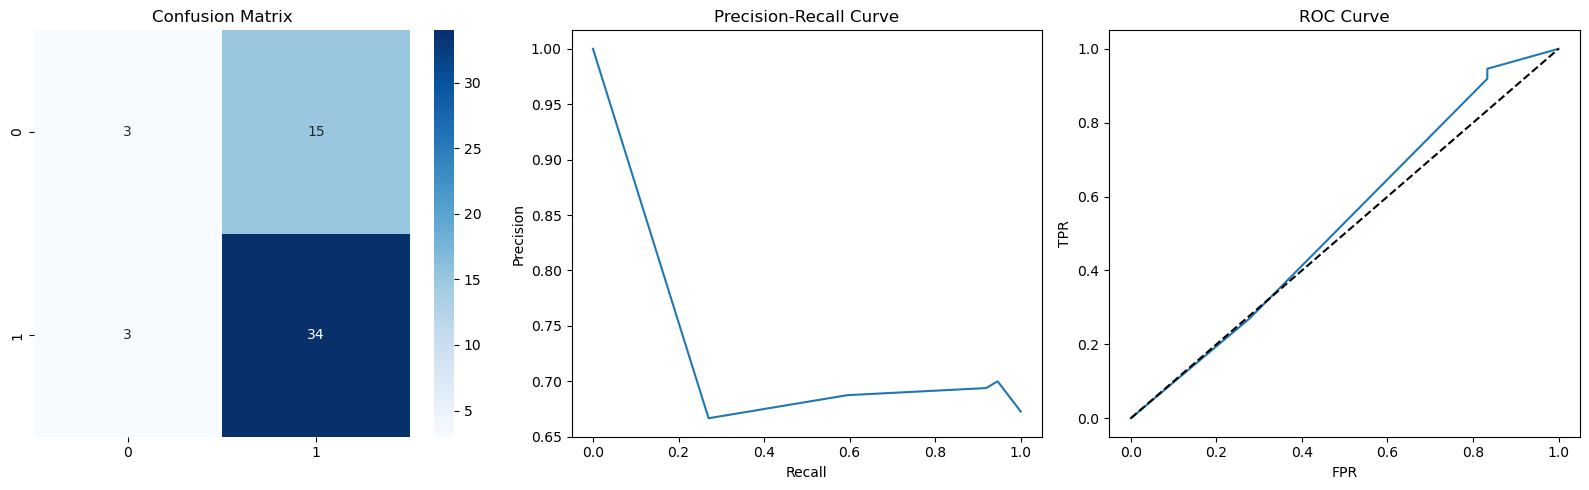

In [115]:
from sklearn.neighbors import KNeighborsClassifier
train_and_score(KNeighborsClassifier(), "Метод ближайших соседей")
plt.show()

Метод ближайших соседей показывает сильный перекос в сторону recall (91.9%) при сравнительно низком precision (69.4%). Это означает, что модель правильно идентифицирует большинство положительных случаев, но при этом дает много ложных срабатываний. Качество предсказаний подтверждается неудовлетворительными кривыми Precision-Recall и ROC.

Среди всех проверенных моделей логистическая регрессия продемонстрировала наилучшие результаты, наиболее точно разделяя истинные и ложные наблюдения. Ее сбалансированные показатели precision и recall делают ее предпочтительным выбором для данной задачи.